In [6]:
import pandas as pd
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
from PIL import Image

import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats import t

import statistics
import math


In [7]:
info_car2PPO_episode_1  = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_three_way/noise/IRL_protest_result_NPCnoise_three_way.json', lines=True)
info_car2PPO_episode_1.columns = info_car2PPO_episode_1.columns.str.replace('noise', 'NPC noise')


In [5]:
info_car2PPO_episode_1['reward']

0       -6.987074
1       -7.134801
2       -6.881039
3       -6.921214
4       -6.911102
           ...   
29995    1.026370
29996   -0.474803
29997   -0.894124
29998   -0.762706
29999   -0.166459
Name: reward, Length: 30000, dtype: float64

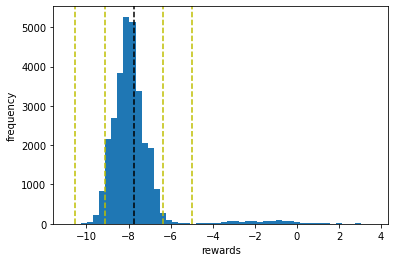

In [6]:
plt.hist(info_car2PPO_episode_1['reward'],bins=50,histtype='stepfilled')
plt.xlabel('rewards')
plt.ylabel('frequency')
m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

plt.show()

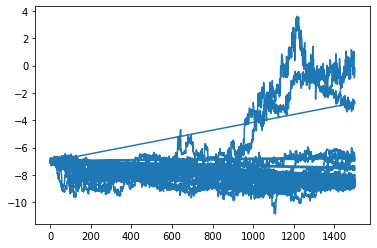

In [7]:
plt.plot(info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'])


In [8]:
myMean = info_car2PPO_episode_1['reward'].mean()
myMean

-7.750416893012001

In [9]:
SE = sem(info_car2PPO_episode_1['reward'])
SE

0.008016823486992201

In [10]:
confLevel = 0.95

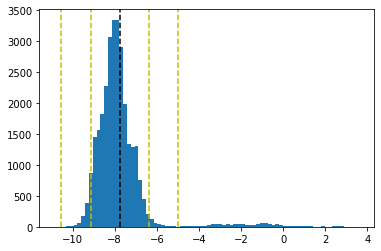

In [11]:
plt.hist(info_car2PPO_episode_1['reward'],bins=80)

m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')
Confidence_interval = sd/math.sqrt(3982)
Confidence_interval = Confidence_interval*1.960


plt.show()

In [12]:
print ("Mean : ", m)
print ("Std Deviation : ", sd)
print ("1st Std Interval : ", m-sd , m+sd )
print ("2nd Std Interval : ", m - 2*sd , m + 2*sd )
print ("Confidence Interval : ", Confidence_interval)

print ("Confidence Interval : ", m - Confidence_interval , m + Confidence_interval)


Mean :  -7.750416893012
Std Deviation :  1.3885545594781985
1st Std Interval :  -9.138971452490198 -6.361862333533802
2nd Std Interval :  -10.527526011968398 -4.973307774055603
Confidence Interval :  0.043128901064707965
Confidence Interval :  -7.7935457940767074 -7.707287991947292


In [15]:
t.interval(0.65,info_car2PPO_episode_1['reward'],loc=m, scale=sd)


(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

<AxesSubplot:xlabel='reward', ylabel='Density'>

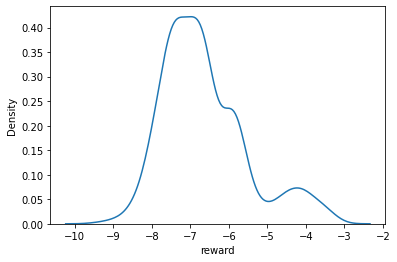

In [12]:
sns.kdeplot(info_car2PPO_episode_1['reward'],)


<AxesSubplot:xlabel='state', ylabel='Density'>

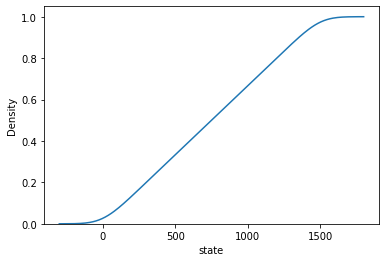

In [13]:
sns.kdeplot(
    data=info_car2PPO_episode_1['reward'], x=info_car2PPO_episode_1['state'],
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='state', ylabel='reward'>

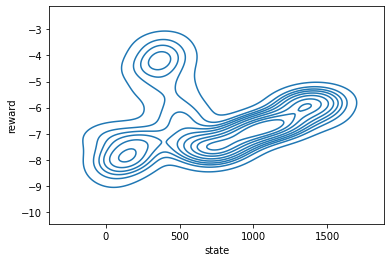

In [14]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward")

<AxesSubplot:xlabel='state', ylabel='reward'>

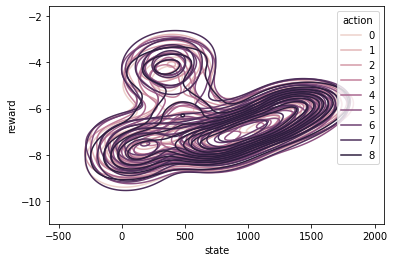

In [15]:
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward", hue="action"
)


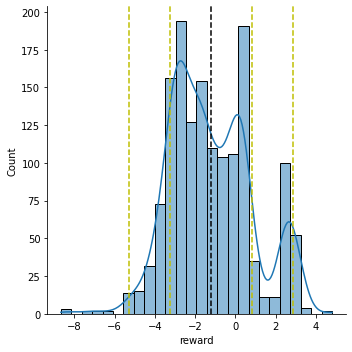

In [19]:
sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True)
plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

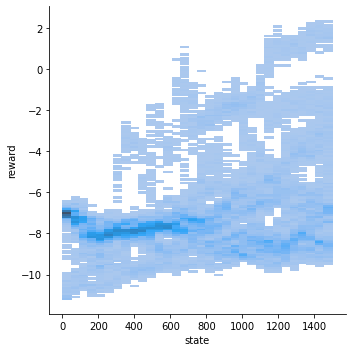

In [11]:
sns.displot(data=info_car2PPO_episode_1, x="state", y="reward")


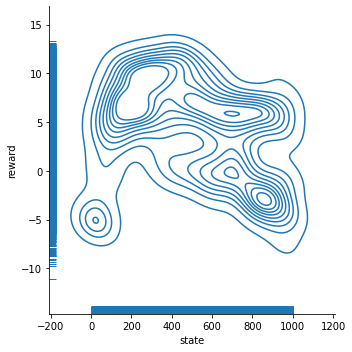

In [19]:
g = sns.displot(data=info_car2PPO_episode_1, x="state", y="reward", kind="kde", rug=True)


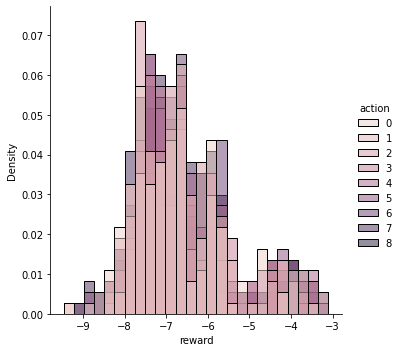

In [17]:

sns.displot(info_car2PPO_episode_1, x="reward", hue="action", stat="density")


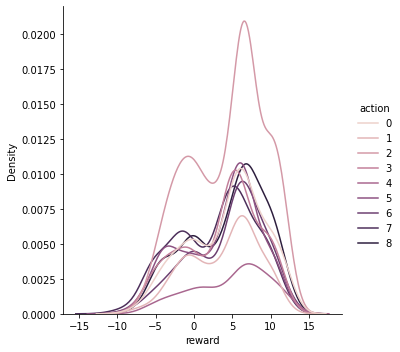

In [21]:
sns.displot(info_car2PPO_episode_1, x="reward", hue="action", kind="kde")


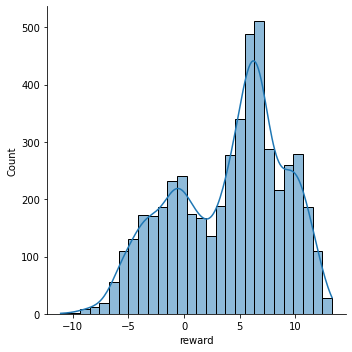

In [22]:
sns.displot(info_car2PPO_episode_1, x="reward", kde=True)


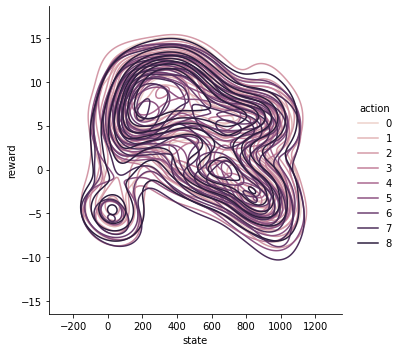

In [23]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", hue="action", kind="kde")


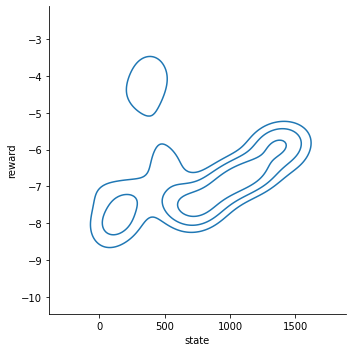

In [18]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", kind="kde", thresh=.2, levels=4)


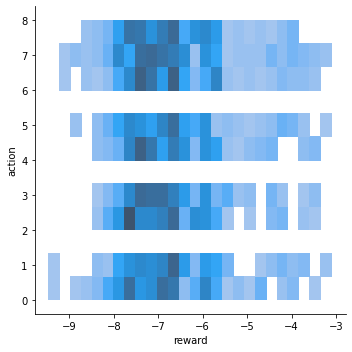

In [19]:
sns.displot(info_car2PPO_episode_1, x="reward", y="action", )


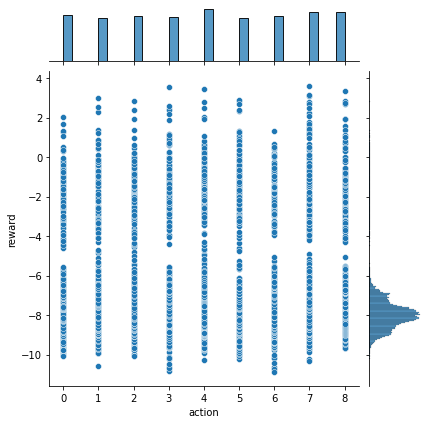

In [13]:
sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward")


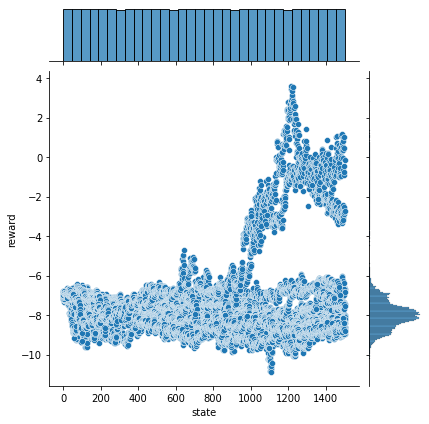

In [14]:
sns.jointplot(data=info_car2PPO_episode_1, x="state", y="reward")


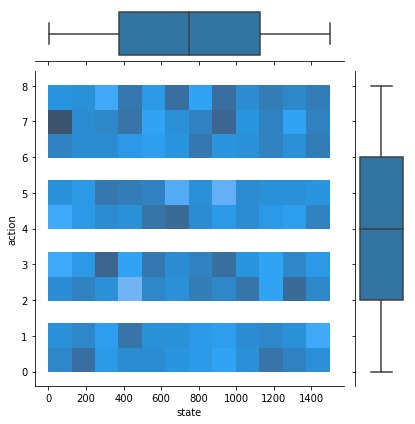

In [22]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="action")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

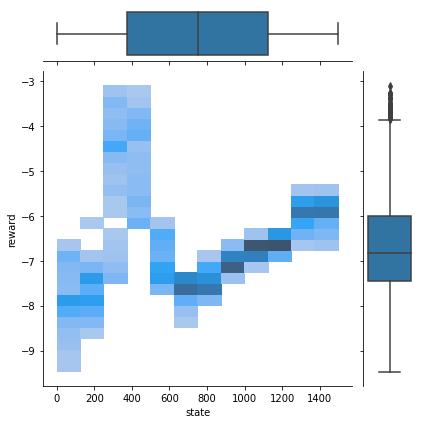

In [23]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

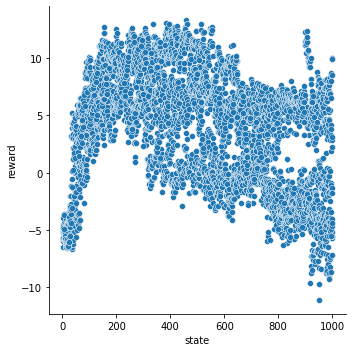

In [31]:
sns.relplot(data=info_car2PPO_episode_1, x="state", y="reward")
# sns.rugplot(data=info_car2PPO_episode_1, x="bill_length_mm", y="bill_depth_mm")

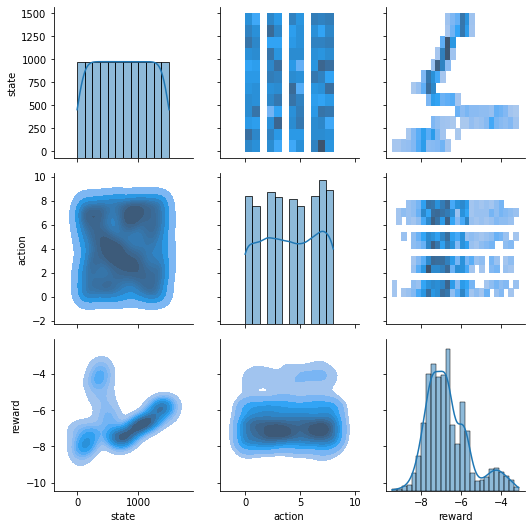

In [24]:
g = sns.PairGrid(info_car2PPO_episode_1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reward'>

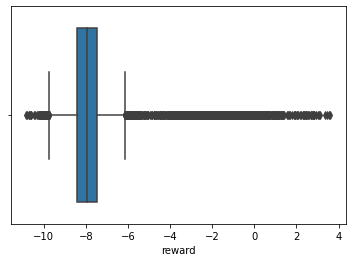

In [15]:
sns.boxplot(info_car2PPO_episode_1['reward'])


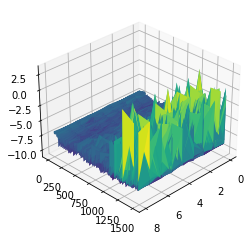

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 45)

ax.plot_trisurf(info_car2PPO_episode_1['action'], info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 


In [8]:
# Episode 1

info_car1 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_three_way/noise/info_car1.json', lines=True)
info_car1 = pd.concat([info_car1.drop(['control'], axis=1), info_car1['control'].apply(pd.Series)], axis=1)
info_car2 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_three_way/noise/info_car2.json', lines=True)
info_car2 = pd.concat([info_car2.drop(['control'], axis=1), info_car2['control'].apply(pd.Series)], axis=1)
info_car3 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_three_way/noise/info_car3.json', lines=True)
info_car3 = pd.concat([info_car3.drop(['control'], axis=1), info_car3['control'].apply(pd.Series)], axis=1)


In [18]:
info_car1.shape

(30000, 35)

In [19]:
print((info_car3['collision_vehicles']!= 0).values.sum()/30000,"collision_vehicles")
print((info_car3['collision_other']!= 0).values.sum()/30000, "collision_other")
print((info_car3['intersection_offroad'] != 0).values.sum()/30000,"intersection_offroad")
print ((info_car3['intersection_otherlane'] != 0).values.sum()/30000, "intersection_otherlane")


0.1112 collision_vehicles
0.015333333333333332 collision_other
0.13366666666666666 intersection_offroad
0.13366666666666666 intersection_otherlane


In [4]:
SE_CO = sem(info_car3['collision_vehicles'] != 0)
print (SE_CO)
SE_CP = sem(info_car3['collision_other'] != 0)
print (SE_CP)
SE_OS = sem(info_car3['intersection_otherlane'] != 0)
print (SE_OS)


0.0018151019677064351
0.0007094299475182559
0.0019647200734782895


In [4]:
print (info_car3['collision_vehicles'].idxmax())
print (info_car3['collision_other'].idxmax())
print (info_car3['intersection_offroad'].idxmax())

# 268
# 0.134

20776
29540
10075


In [5]:
print (info_car3['collision_vehicles'].idxmax()*0.134)
print (info_car3['collision_other'].idxmax()*0.134)
print (info_car3['intersection_offroad'].idxmax()*0.134)

# 268
# 0.134

2783.9840000000004
3958.36
1350.0500000000002


In [9]:
mean_collision_vehicles = []
for chunk in np.array_split(info_car2['collision_vehicles'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_collision_vehicles.append((res))
    print (x, " : ", res)
mean_collision_vehicles = statistics.mean(mean_collision_vehicles)
mean_collision_vehicles

0  :  1
1500  :  1
4061  :  1062
5411  :  912
7036  :  1037
7500  :  1
10248  :  1249
11851  :  1352
12916  :  917
14720  :  1221
16111  :  1112
17824  :  1325
18000  :  1
20777  :  1278
21000  :  1
23404  :  905
24000  :  1
25500  :  1
27000  :  1
28500  :  1


618.95

In [10]:
mean_collision_other = []
for chunk in np.array_split(info_car2['collision_other'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_collision_other.append((res))
    print (x, " : ", res)
mean_collision_other = statistics.mean(mean_collision_other)
mean_collision_other

1363  :  1364
1500  :  1
3000  :  1
4500  :  1
6000  :  1
7500  :  1
9000  :  1
10500  :  1
12000  :  1
13500  :  1
16498  :  1499
16500  :  1
18000  :  1
19500  :  1
21000  :  1
22500  :  1
24000  :  1
25500  :  1
27000  :  1
28500  :  1


144.05

In [11]:
mean_intersection_offroad = []
for chunk in np.array_split(info_car2['intersection_offroad'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_intersection_offroad.append((res))
    print (x, " : ", res)
mean_intersection_offroad = statistics.mean(mean_intersection_offroad)
mean_intersection_offroad

0  :  1
1500  :  1
3000  :  1
5944  :  1445
6000  :  1
7500  :  1
9000  :  1
10500  :  1
12381  :  382
13500  :  1
15000  :  1
16500  :  1
18000  :  1
19500  :  1
22425  :  1426
22500  :  1
24000  :  1
25500  :  1
27000  :  1
28500  :  1


163.5

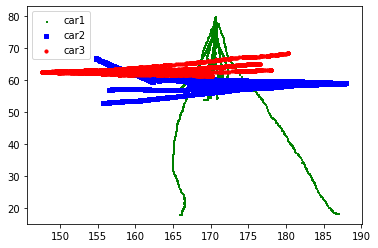

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(info_car1['x'][:15000], info_car1['y'][:15000], s=1, c='g', marker="s", label='car1')
ax1.scatter(info_car2['x'][:15000], info_car2['y'][:15000], s=10, c='b', marker="s", label='car2')
ax1.scatter(info_car3['x'][:15000],info_car3['y'][:15000], s=10, c='r', marker="o", label='car3')
plt.legend(loc='upper left');
plt.show()

### RQ2

In [4]:
print((info_car2PPO_episode_1['noise']!= 0).values.sum()/30000,"noise")


0.05043333333333333 noise


In [5]:
info_car2PPO_episode_1['noise'].value_counts()


0    28487
1     1513
Name: noise, dtype: int64

In [6]:
print (info_car2PPO_episode_1['noise'].idxmax())


972


In [7]:
print (info_car2PPO_episode_1['noise'].idxmax()*0.134)


130.24800000000002


In [8]:
mean_noise = []
for chunk in np.array_split(info_car2PPO_episode_1['noise'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_noise.append((res))
    print (x, " : ", res)
mean_noise = statistics.mean(mean_noise)
mean_noise

972  :  973
1778  :  279
3135  :  136
4772  :  273
6060  :  61
7607  :  108
9208  :  209
10894  :  395
12180  :  181
14832  :  1333
15155  :  156
16500  :  1
18312  :  313
19603  :  104
21059  :  60
22754  :  255
24239  :  240
25703  :  204
27113  :  114
28596  :  97


274.6

### RQ3

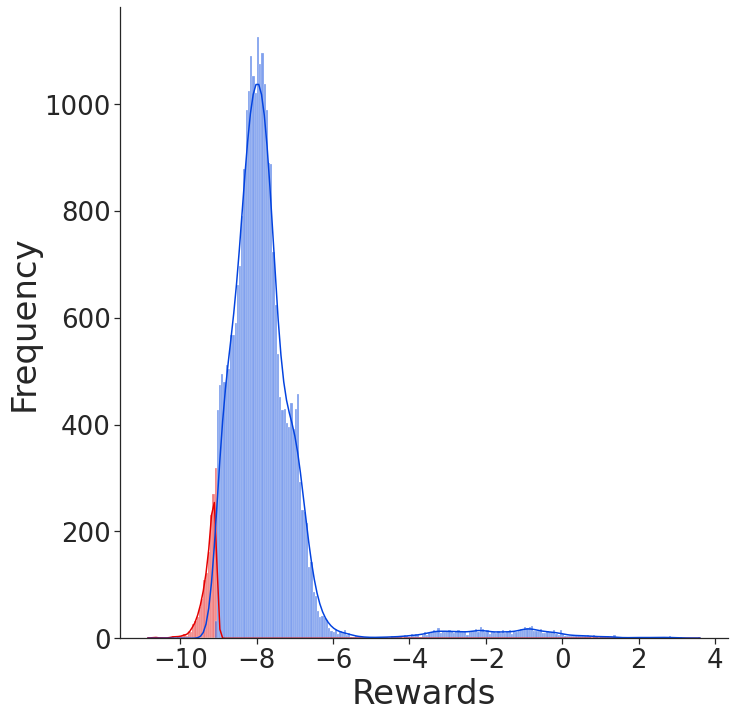

In [4]:
sns.reset_orig()
sns.set(font_scale = 1.5)
color = sns.color_palette()
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
my_palette = sns.color_palette(["#0343DF", "#E50000"])



g = sns.displot(info_car2PPO_episode_1, x="reward", kde=True,  hue="NPC noise",palette=my_palette,height=10,color=color[0], legend=False)
# plt.axvline(-8, color='y', linestyle='dashed')
# g.fig.set_figwidth(8)
# g.fig.set_figheight(8)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
g.set_axis_labels('Rewards','Frequency',fontsize=34)

plt.savefig("RQ3_threeway_25.jpg", bbox_inches = "tight")

In [8]:
df = pd.DataFrame()
df['x'] = info_car2['x']
df['y'] = info_car2['y']
df['noise'] = info_car2PPO_episode_1['noise']

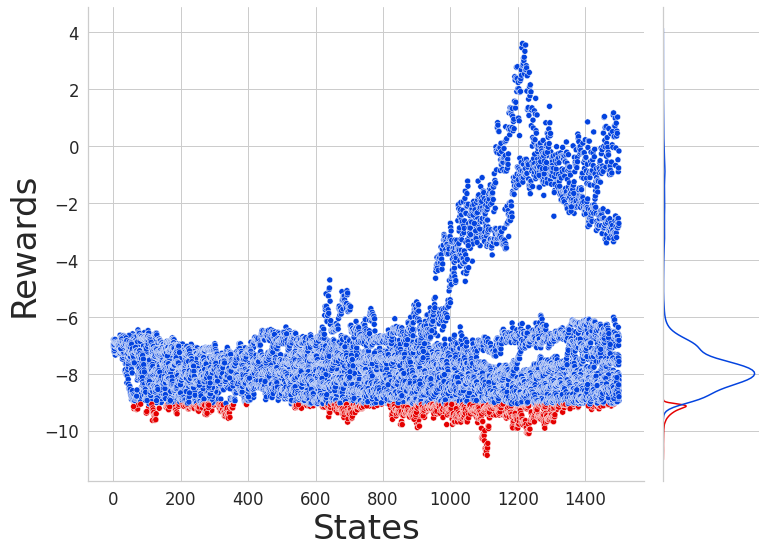

In [5]:
sns.reset_orig()
# sns.color_palette("rocket")
my_palette = sns.color_palette(["#0343DF", "#E50000"])

sns.set(font_scale = 1.5)

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward", hue="NPC noise",palette=my_palette)
g.plot(sns.scatterplot, sns.kdeplot)
g.ax_marg_x.remove()
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
g.set_axis_labels('States','Rewards',fontsize=34)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
g.ax_joint.legend_.remove()
plt.savefig("RQ3_threeway_26.jpg", bbox_inches = "tight")

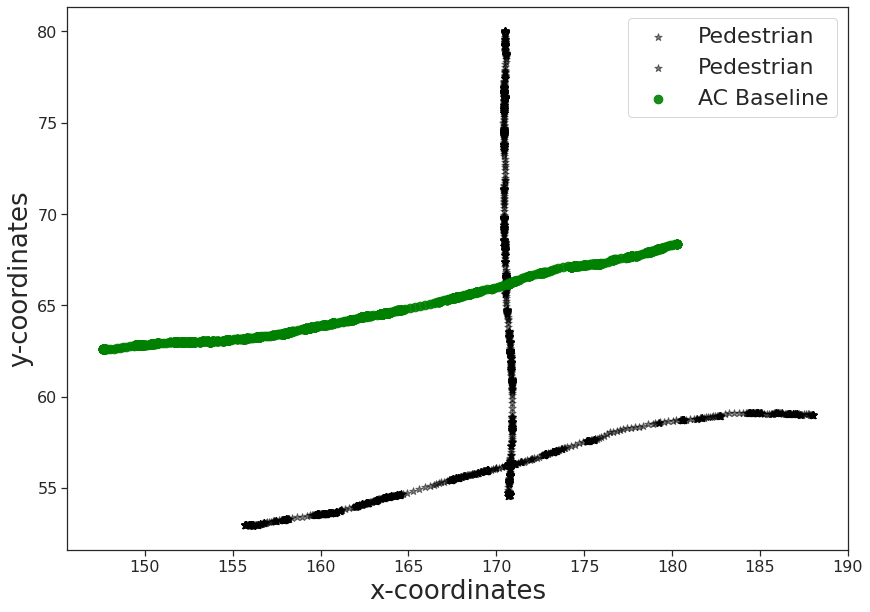

In [7]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)




# ax1.scatter(info_car1['x'][:1500], info_car1['y'][:1500], s=60, c='black', marker="*", label='car1')
# ax1.scatter(info_car2['x'][:1500], info_car2['y'][:1500], s=60, c='black', marker="*", label='car2')
# ax1.scatter(info_car3['x'][:1500],info_car3['y'][:1500], s=300, c='g', marker="o", label='car3')

# plt.legend(loc='upper left')
# plt.show()



fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][:1500], info_car1['y'][:1500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][:1500],info_car2['y'][:1500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][:1500], info_car3['y'][:1500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.show()

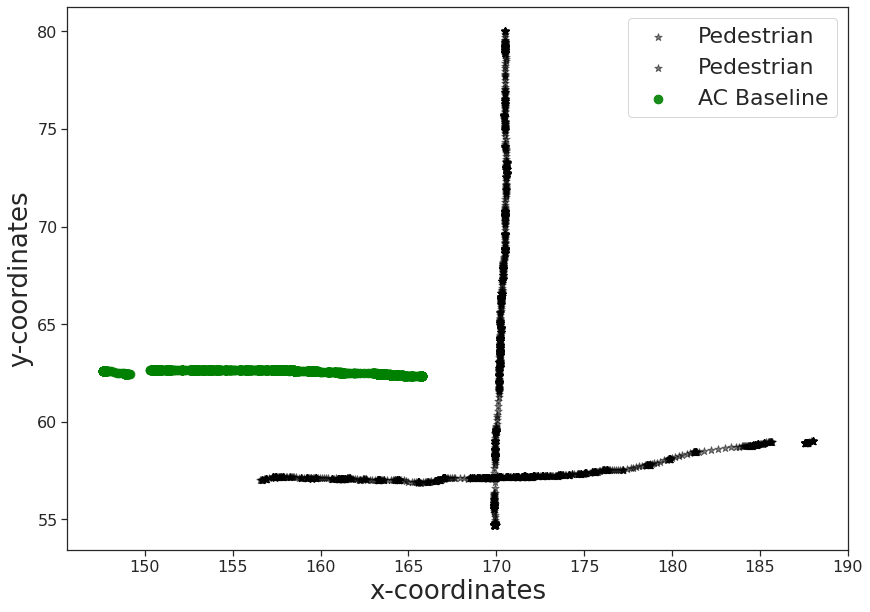

In [8]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][6072:7571], info_car1['y'][6072:7571], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][6072:7571],info_car2['y'][6072:7571], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][6072:7571], info_car3['y'][6072:7571], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.show()

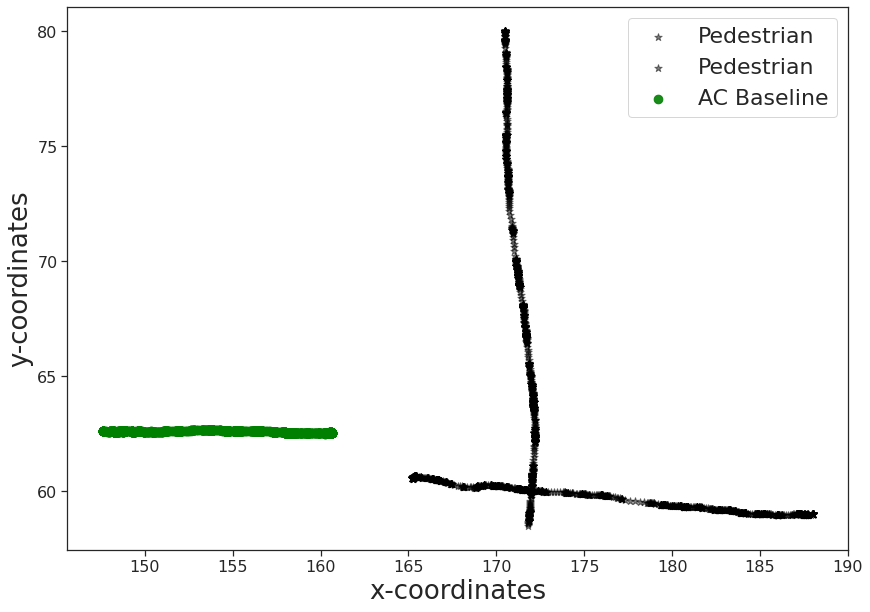

In [12]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][10500:12000], info_car1['y'][10500:12000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][10500:12000],info_car2['y'][10500:12000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][10500:12000], info_car3['y'][10500:12000], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.show()

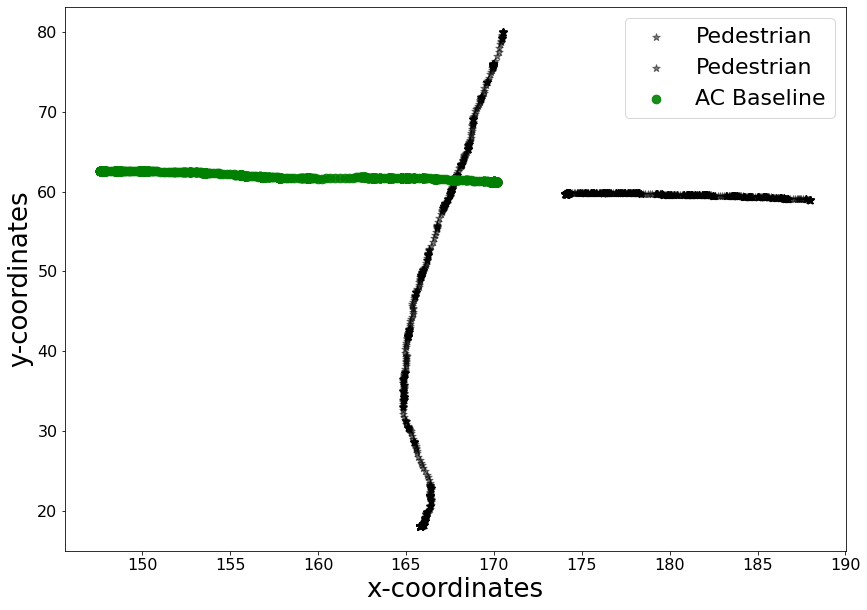

In [5]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][12001:13500], info_car1['y'][12001:13500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][12001:13500],info_car2['y'][12001:13500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][12001:13500], info_car3['y'][12001:13500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.savefig("RQ3_threeway_14.pdf")

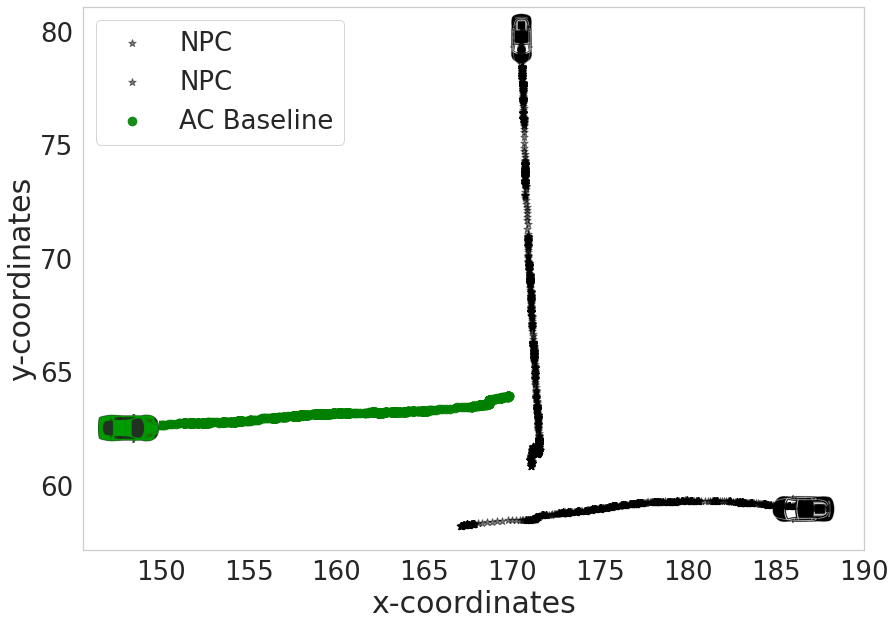

In [9]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][13501:15000], info_car1['y'][13501:15000], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][13501:15000],info_car2['y'][13501:15000], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][13501:15000], info_car3['y'][13501:15000], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)



im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.255, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.8, 0.14, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.538, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')

plt.savefig("RQ3_threeway_15.jpg", bbox_inches = "tight")

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


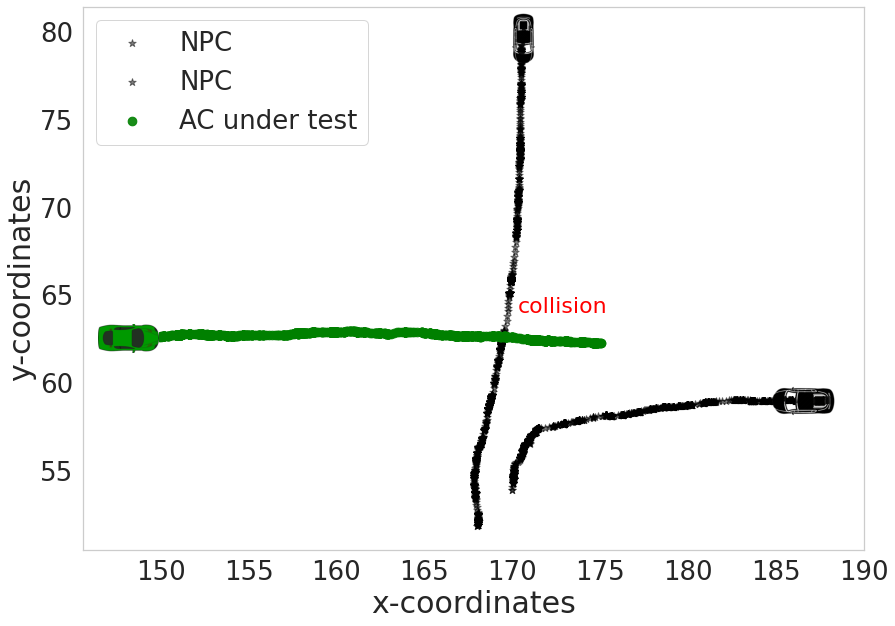

In [10]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][15001:16500], info_car1['y'][15001:16500], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][15001:16500],info_car2['y'][15001:16500], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][15001:16500], info_car3['y'][15001:16500], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

# plt.text(160.0, 63, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')
plt.text(170.3, 64, "collision", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.38, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.8, 0.29, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.54, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')
# plt.text(170.3, 64, "collision", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_16.jpg", bbox_inches = "tight")

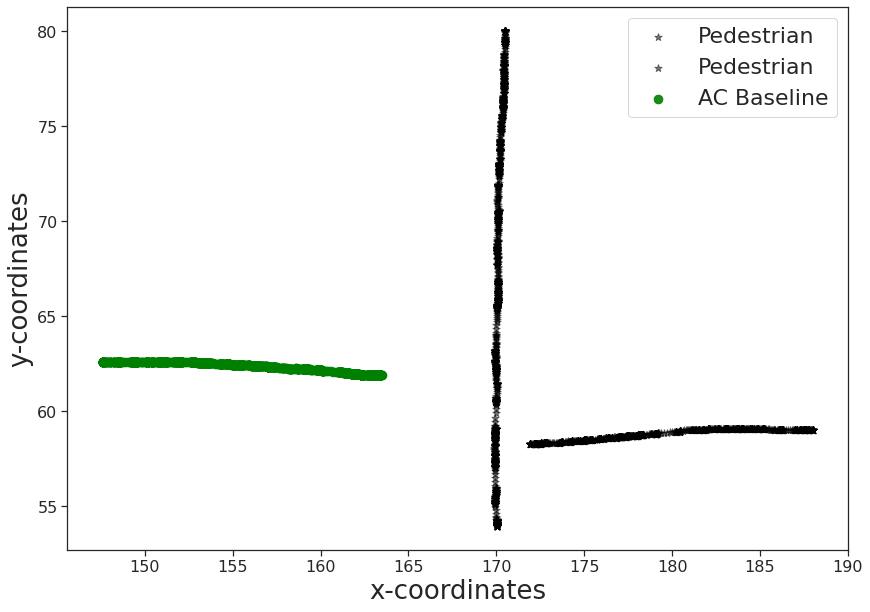

In [16]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][16501:18000], info_car1['y'][16501:18000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][16501:18000],info_car2['y'][16501:18000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][16501:18000], info_car3['y'][16501:18000], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.show()

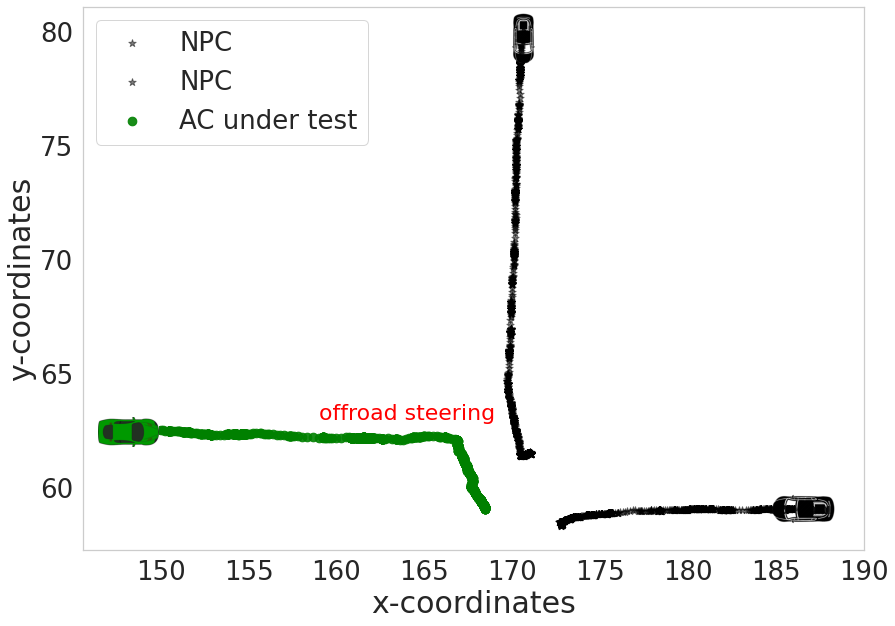

In [11]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][19501:21000], info_car1['y'][19501:21000], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][19501:21000],info_car2['y'][19501:21000], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][19501:21000], info_car3['y'][19501:21000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(159, 63, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')
# plt.text(170.3, 64, "collision", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.25, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.8, 0.14, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.54, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')
# plt.text(161.3, 63, "offroad steeing", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_17.jpg", bbox_inches = "tight")

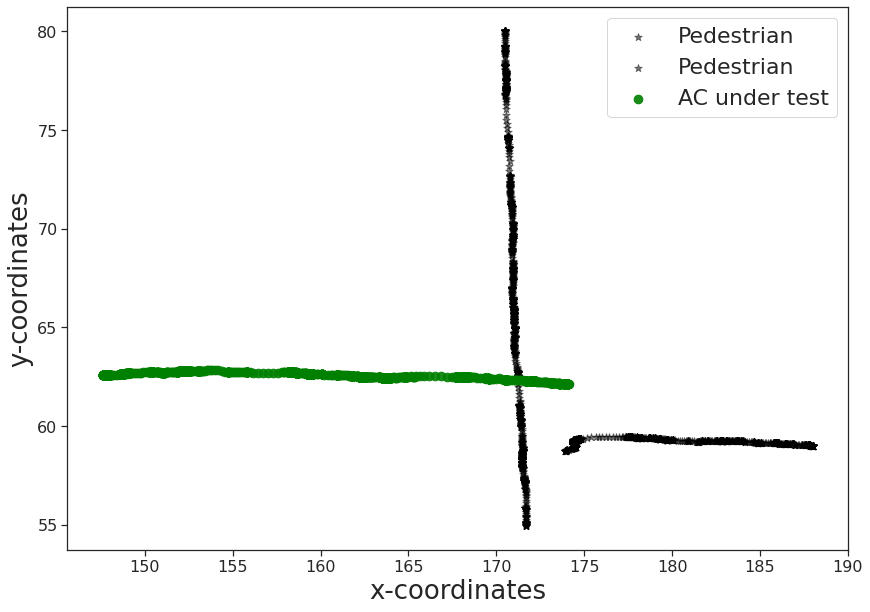

In [21]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][22501:24000], info_car1['y'][22501:24000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][22501:24000],info_car2['y'][22501:24000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][22501:24000], info_car3['y'][22501:24000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.show()

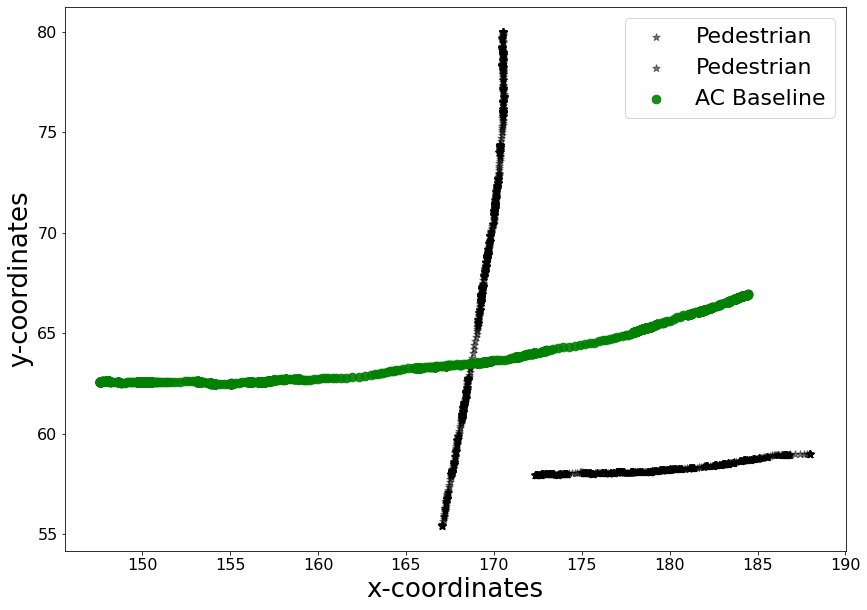

In [16]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][24001:25500], info_car1['y'][24001:25500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][24001:25500],info_car2['y'][24001:25500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][24001:25500], info_car3['y'][24001:25500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
# plt.text(161.3, 63, "offroad steeing", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_18.pdf")

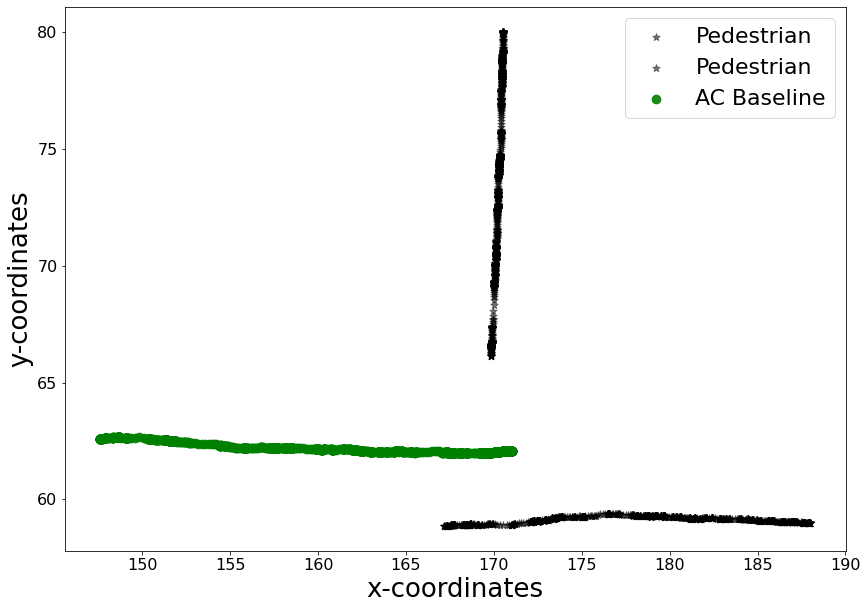

In [17]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][25501:27000], info_car1['y'][25501:27000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][25501:27000],info_car2['y'][25501:27000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][25501:27000], info_car3['y'][25501:27000], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
# plt.text(161.3, 63, "offroad steeing", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_19.pdf")

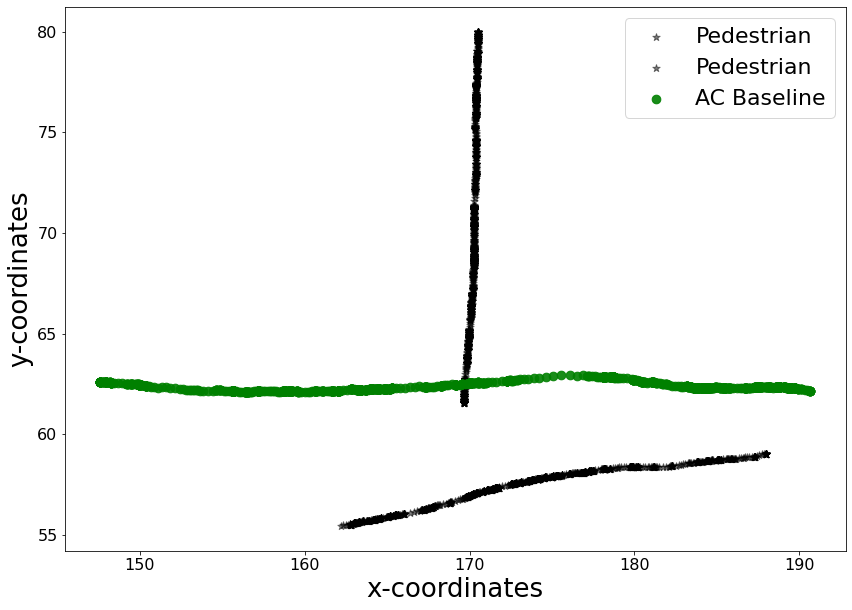

In [18]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][27001:28500], info_car1['y'][27001:28500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][27001:28500],info_car2['y'][27001:28500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][27001:28500], info_car3['y'][27001:28500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
# plt.text(161.3, 63, "offroad steeing", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_20.pdf")

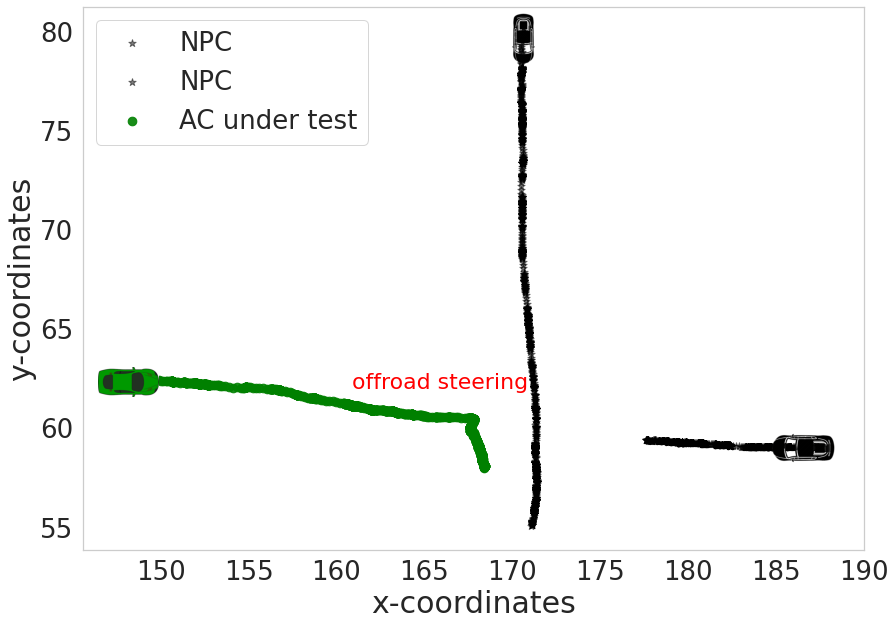

In [12]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][28501:30000], info_car1['y'][28501:30000], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][28501:30000],info_car2['y'][28501:30000], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][28501:30000], info_car3['y'][28501:30000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(160.9, 62, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')
# plt.text(170.3, 64, "collision", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.32, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.8, 0.225, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.54, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')
# plt.text(163, 62, "offroad steeing", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_21.jpg", bbox_inches = "tight")

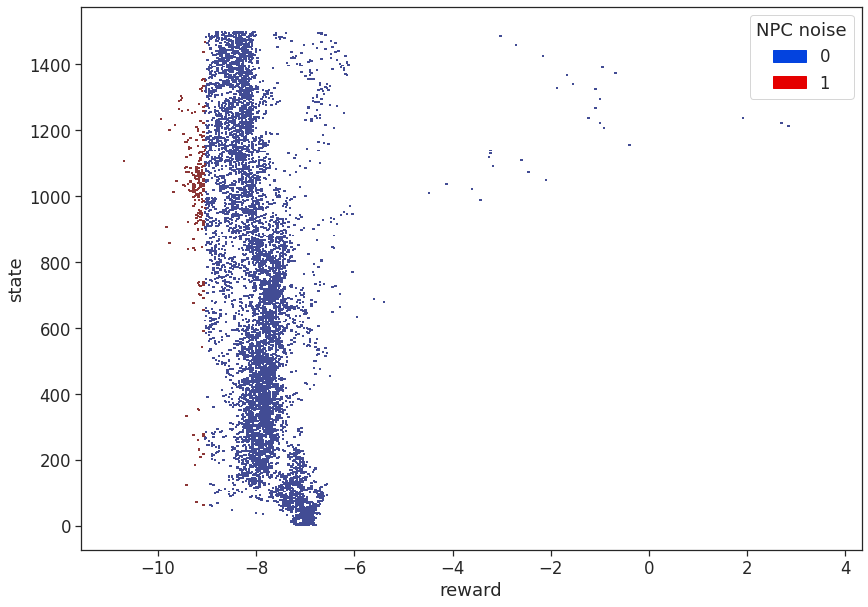

In [23]:
sns.reset_orig()
sns.set(font_scale = 1.5)

fig = plt.figure(figsize=(14,10))
my_palette = sns.color_palette(["#0343DF", "#E50000"])
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
sns.histplot(
    info_car2PPO_episode_1, x="reward", y="state", hue="NPC noise", palette=my_palette,
    bins=500,
    pthresh=.4, pmax=.5, 
)
plt.savefig("RQ3_threeway_27.pdf")